<a href="https://colab.research.google.com/github/fiftybucks101/Logistic_Regression/blob/main/Logistic_Regression_Irisdataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
# Basic information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
# Checking null values

df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

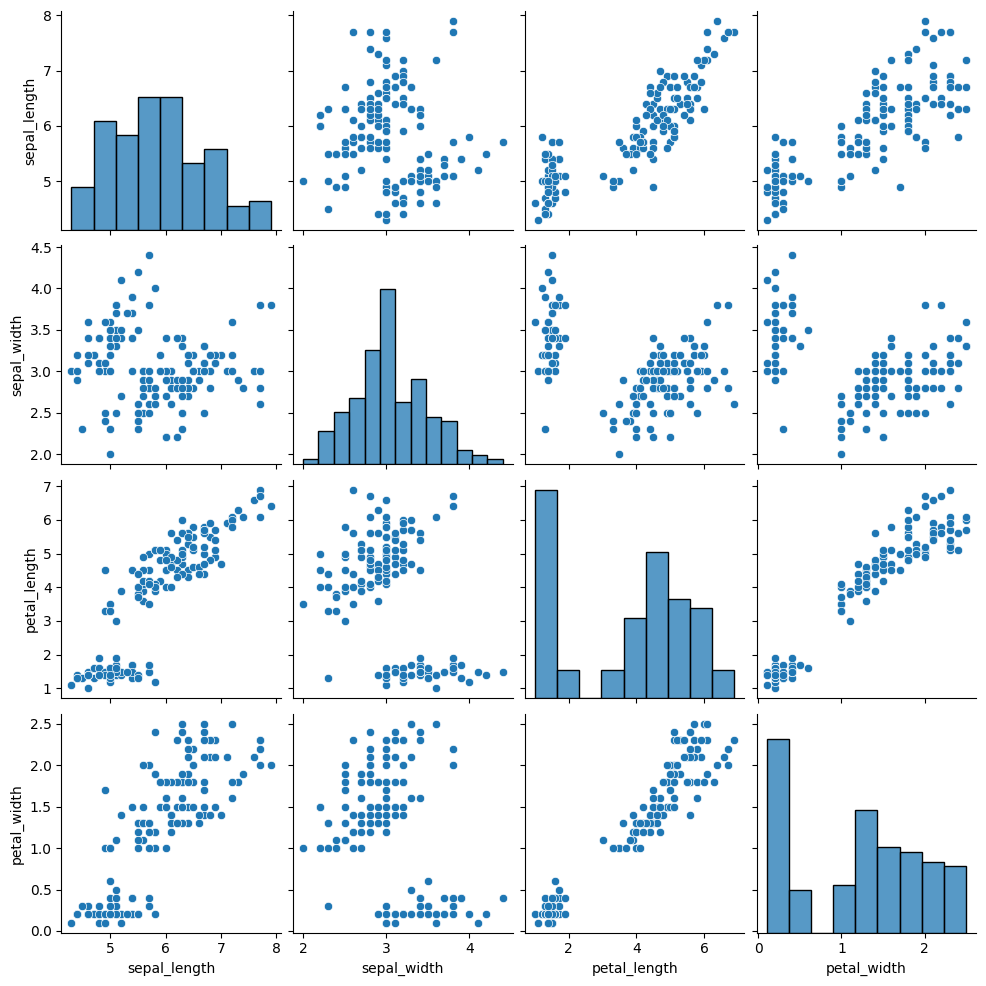

In [6]:
# visualization and EDA

sns.pairplot(df)

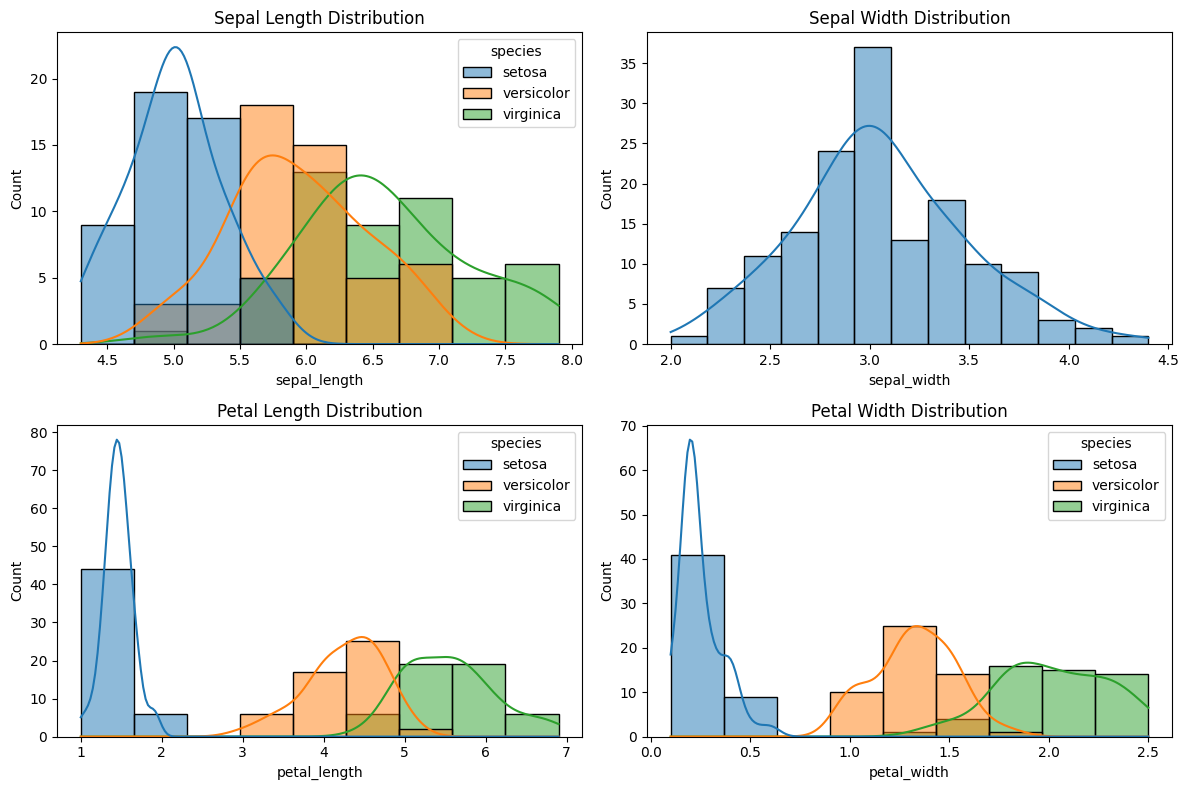

In [7]:
# multiple histogram plot using subplot

fig, axs = plt.subplots(2,2,figsize=(12,8))

sns.histplot(x=df['sepal_length'], kde=True, hue = df['species'], ax= axs[0,0])
axs[0,0].set_title('Sepal Length Distribution')
sns.histplot(data=df, x='sepal_width', kde=True, ax= axs[0,1])
axs[0,1].set_title('Sepal Width Distribution')
sns.histplot(data=df, x='petal_length', kde=True, hue = 'species', ax= axs[1,0])
axs[1,0].set_title('Petal Length Distribution')
sns.histplot(data=df, x='petal_width', kde=True, hue = 'species', ax= axs[1,1])
axs[1,1].set_title('Petal Width Distribution')

plt.tight_layout()

In [8]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [9]:
df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [10]:
# drop verginice to make binary classification

df = df[df['species'] != 'setosa']

In [11]:
# convert categorical feature species into numerical with encoding

df['species'] = df['species'].map({'versicolor':0,'virginica':1})

<ipython-input-11-0c2d9d4dba3d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['species'] = df['species'].map({'versicolor':0,'virginica':1})


In [12]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,0
51,6.4,3.2,4.5,1.5,0
52,6.9,3.1,4.9,1.5,0
53,5.5,2.3,4.0,1.3,0
54,6.5,2.8,4.6,1.5,0


In [13]:
# seperating dependent and independent variables

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [14]:
# Train Test Split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)


In [15]:
X_train.shape

(75, 4)

In [16]:
X_test.shape

(25, 4)

In [17]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [18]:
lr.fit(X_train,y_train)

LogisticRegression()

In [19]:
y_pred = lr.predict(X_test)

In [20]:
y_pred

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1])

In [21]:
from sklearn.metrics import accuracy_score, classification_report

print("Test Accuracy Score: ", accuracy_score(y_test,y_pred))


Test Accuracy Score:  0.92


In [22]:
y_train_pred = lr.predict(X_train)

In [23]:
print("Train Accuracy Score: ", accuracy_score(y_train,y_train_pred))

Train Accuracy Score:  0.9733333333333334


In [25]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.91      0.91      0.91        11

    accuracy                           0.92        25
   macro avg       0.92      0.92      0.92        25
weighted avg       0.92      0.92      0.92        25



In [28]:
# training data with hyperparameter tuning and comparing the the accuracy score

from sklearn.model_selection import GridSearchCV
parameter = {'penalty':['l1','l2','elasticnet'],'C':[0.0001,0.001,0.01,0.1,1,2,3,5,7,8,10,20,40,60,80,100],'max_iter':[50,100,200,300],'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}

In [29]:
classifier_regressor = GridSearchCV(lr,param_grid=parameter,scoring='accuracy',cv=10)

In [31]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")
classifier_regressor.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 2, 3, 5, 7, 8, 10,
                               20, 40, 60, 80, 100],
                         'max_iter': [50, 100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy')

In [32]:
print(classifier_regressor.best_params_)

{'C': 1, 'max_iter': 200, 'penalty': 'l2', 'solver': 'sag'}


In [33]:
print(classifier_regressor.best_score_)

1.0


In [34]:
y_pred = classifier_regressor.predict(X_test)

In [35]:
print("Accuracy after hyperparameter tuining = " , accuracy_score(y_test,y_pred))

Accuracy after hyperparameter tuining =  0.92


In [36]:
y_train_pred = classifier_regressor.predict(X_train)
print("Accuracy after hyperparameter tuining = " , accuracy_score(y_train,y_train_pred))

Accuracy after hyperparameter tuining =  1.0


In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92        14
           1       0.85      1.00      0.92        11

    accuracy                           0.92        25
   macro avg       0.92      0.93      0.92        25
weighted avg       0.93      0.92      0.92        25

